# Exam R
NAME = "Mario van Kessel"

COLLABORATOR = "Ivo van Zitteren"

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [114]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [13]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

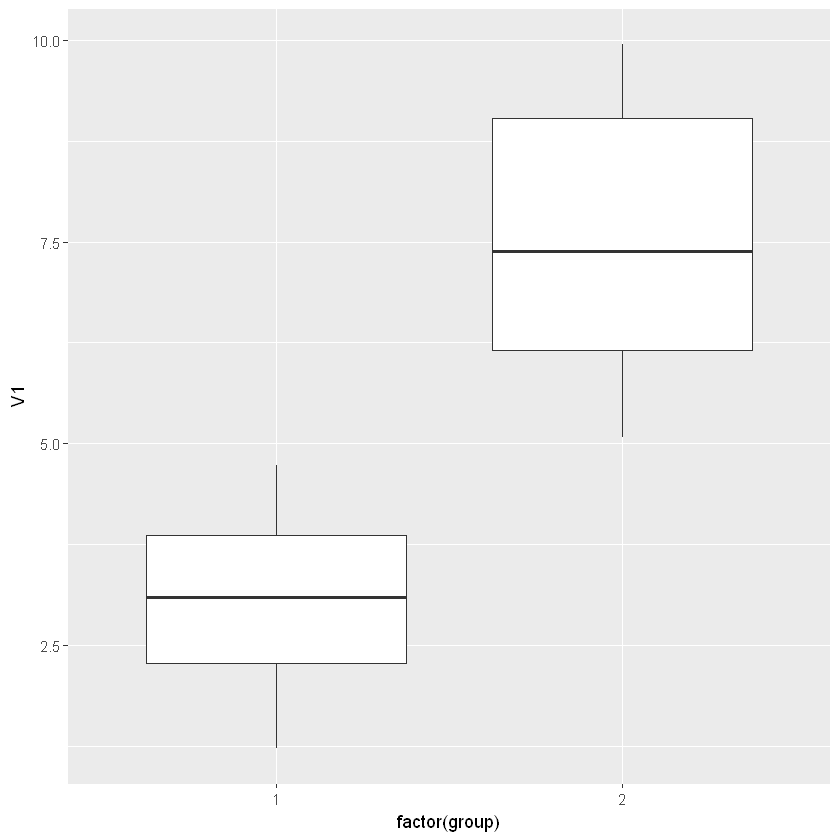

In [47]:
# We just used ggplot and specified the x-and y axis. I got Warning message: Continuous x aesthetic – did you forget aes(group=…)
# so we converted group to a factor. After that we added geom_boxplot() to create a boxplot.
ggplot(data=df1 , aes(x=factor(group), y=V1)) + geom_boxplot()

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [50]:
# We used the formula lm(y~x, data=mydata) in order to run the regression.
reg1 <- lm(response ~ V1, data=df1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [58]:
# We watched a youtube tutorial in order to solve this question. We require gvlma in order to find out if the assumptions hold.
# As we can see, all four criterias are (acceptably) met.
require (gvlma)
gvmodel <- gvlma(reg1)
summary(gvmodel)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



NULL

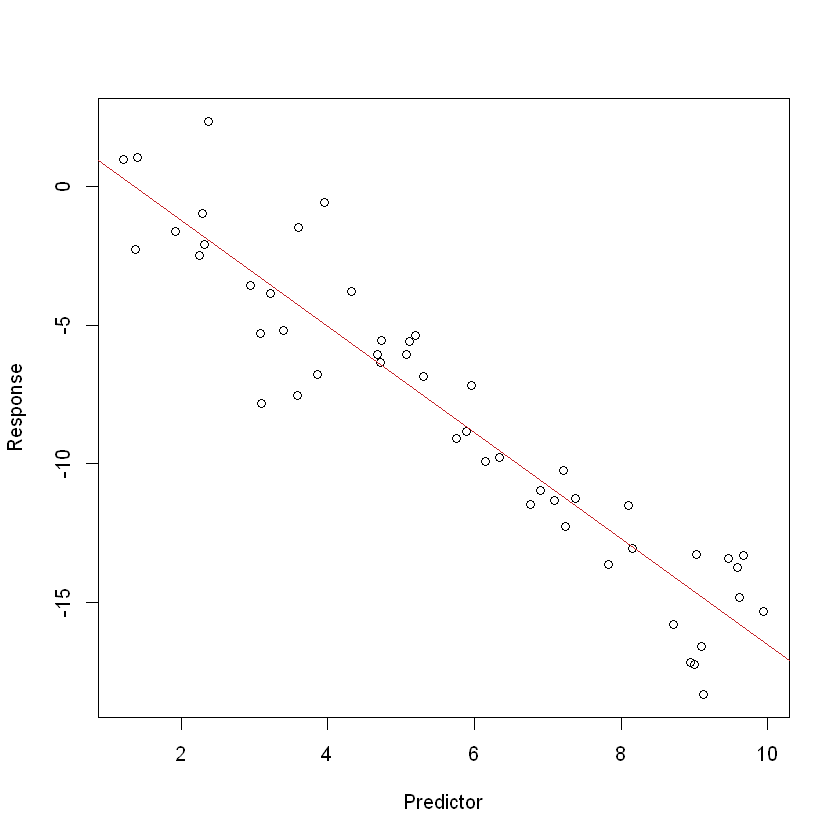

In [155]:
# First, we created a simple scatter plot with V1 on the x-axis and response on the y-axis. After that we googled how to add a 
# regression line, which turned out to be with abline(lm(y~x, data=mydata) and then we added the code for the colour red and the theme.
plot(x=df1$V1, y=df1$response, xlab="Predictor", ylab="Response") + abline(lm(response ~ V1, data=df1), col = "#C42126") + theme_classic()

# Assigment 2

# Packages

In [135]:
install.packages(c("maptools", 'rgdal','rgeos'))
install.packages("../Downloads//thematicmaps_2.1.tar.gz", repos = NULL, type = "source")
library(thematicmaps)
library(tidyverse)

package 'maptools' successfully unpacked and MD5 sums checked
package 'rgdal' successfully unpacked and MD5 sums checked
package 'rgeos' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ivo19\AppData\Local\Temp\RtmpiYDwQS\downloaded_packages


Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-8, (SVN revision 663)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.0.1, released 2015/09/15
 Path to GDAL shared files: C:/Users/ivo19/Anaconda3/Lib/R/library/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.2, 08 September 2015, [PJ_VERSION: 492]
 Path to PROJ.4 shared files: C:/Users/ivo19/Anaconda3/Lib/R/library/rgdal/proj
 Linking to sp version: 1.2-5 
Loading required package: rgeos
rgeos version: 0.3-23, (SVN revision 546)
 GEOS runtime version: 3.5.0-CAPI-1.9.0 r4084 
 Linking to sp version: 1.2-5 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [143]:
# Notice we used stringAsFactors=FALSE because we don't want R to re-encode strings.
map_municipal <- read.csv2("../Downloads/nld_municipal_map.csv", stringsAsFactors=FALSE, dec=".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

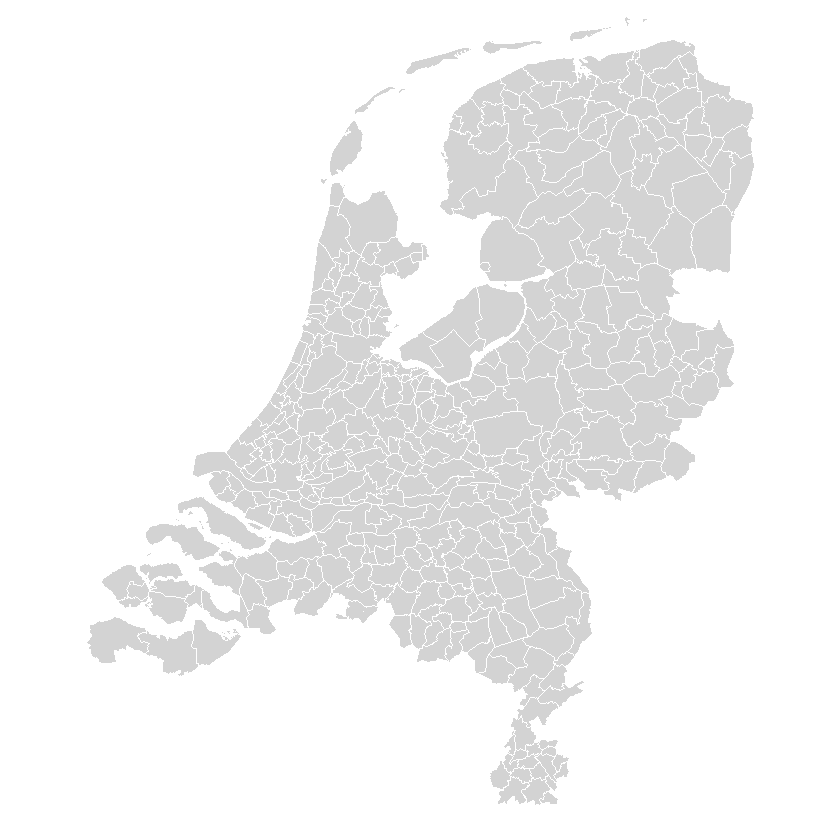

In [144]:
# We usded AddMapLayer to create the empty map of the Netherlands.
AddMapLayer(MapPlot(), map_municipal)

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [153]:
# This was pretty straight-forward, we just had to make sure we redirected to the right file on our pc.
pc4_locations <- read.csv("../Downloads/nld_pc4_locations.csv")
str(pc4_locations)

'data.frame':	4066 obs. of  1 variable:
 $ PC4.X.Y: Factor w/ 4066 levels "1011;122244.1016908;487223.1103132",..: 1 2 3 4 5 6 7 8 9 10 ...


## Assignment 2d

### 2di

Read in the school data


In [146]:
# This was pretty much the same as the last question.
schools <- read.csv2("../Downloads/schools.csv")
head(schools)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [150]:
# We used the hint to our advantage and used substr() to create the new PC4 (which is equal to first 4 numbers in POSTCODE)
schools1 <- schools
PC4 <- substr("POSTCODE",1,4)
head(schools)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


End of notebook